In [ ]:
# Log into your Google account by running the command below and authenticating by clicking on the link shown.
!gcloud auth application-default login

In [ ]:
from google.cloud import bigquery

# Replace with your actual Google Cloud project ID
PROJECT_ID = ""

# Initialize the client with the project ID
client = bigquery.Client(project=PROJECT_ID)


c:\Users\Yatish\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


## Fetching Job Postings

In [ ]:
# All job postings grouped by month and state.
import pandas as pd

query_2 = """
  SELECT
  h.state,
  FORMAT_TIMESTAMP('%Y-%m', h.created) AS monthyear,
  COUNT(*) AS count
FROM `gmailr-395503.linkup.raw_jobs_combined` h
WHERE h.created IS NOT NULL AND h.state IS NOT NULL AND h.country = "USA"
GROUP BY state, monthyear
ORDER BY state, monthyear;
  """
d2 = client.query(query_2).to_dataframe()
d2.to_csv("all_postings.csv")


c:\Users\Yatish\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\cloud\bigquery\table.py:1933: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [ ]:
# Nurse/med job postings.
from tqdm import tqdm
import pandas as pd

parts = [f"{i:03d}" for i in range(1, 429)]
all_dfs = []

for part in tqdm(parts,desc="Processing tables"):

  try:
    query = f"""
    SELECT * FROM(
    SELECT h.title, h.created, h.state,
    CASE
        WHEN (LOWER(h.title) LIKE '%%obgyn%%' OR LOWER(h.title) LIKE '%%gynecologist%%' OR LOWER(h.title) LIKE '%%obstetrician%%') AND NOT REGEXP_CONTAINS(LOWER(h.title), r'assistant|technician|sonographer|nurse|scheduler|supervisor|secretary|business|admin|support|medical assistant|\\bma\\b|\\brn\\b|\\bnp\\b|\\blvn\\b|\\blpn\\b') THEN 'Obstetrics & Gynecology'
        WHEN LOWER(h.title) LIKE '%%certified nurse midwife%%' OR LOWER(h.title) LIKE '%%cnm%%' OR LOWER(h.title) LIKE '%%midwife%%' THEN 'Certified Nurse Midwife'
        WHEN (LOWER(h.title) LIKE '%%labor and delivery%%' OR LOWER(h.title) LIKE '%%l&d nurse%%') AND NOT REGEXP_CONTAINS(LOWER(h.title), r'surgical technologist|technologist|tech|technician|sonographer|scheduler|manager|supervisor|secretary|business|admin|\\bcst\\b|\\bst\\b') THEN 'Labor & Delivery Nurse'
        WHEN (LOWER(h.title) LIKE '%%maternal fetal%%' OR REGEXP_CONTAINS(LOWER(h.title), r'\bmfm\b')) AND NOT REGEXP_CONTAINS(LOWER(h.title), r'technologist|technician|sonographer|scheduler|assistant|associate|manager|supervisor|secretary|business|monetary|admin') THEN 'Maternal-Fetal Medicine'
        ELSE 'Other'
      END AS `job_category`,
    d.*,
    FROM `gmailr-395503.linkup.raw_jobs_combined` h
    JOIN `gmailr-395503.linkup.linkup_job_descriptions_2024-12-31_part_{part}` d
    ON h.hash = d.hash
    WHERE h.created IS NOT NULL AND h.state IS NOT NULL AND h.country = "USA")
    WHERE job_category != 'Other'
    """
    df = client.query(query).to_dataframe()
    all_dfs.append(df)

  except Exception as e:
        print(f"Failed on part {part}: {e}")

full_df = pd.concat(all_dfs, ignore_index=True)
full_df.to_csv('full_data.csv')
print(full_df)


Processing tables:  50%|████▉     | 213/428 [28:31<14:28,  4.04s/it] 

Failed on part 212: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_212 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_212 was not found in location US

Location: US
Job ID: 9b619b3e-8829-46c7-af21-6ece2f04d3ee

Failed on part 213: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_213 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_213 was not found in location US

Location: US
Job ID: 04511c91-8b24-458a-ba05-25e6f57b683c



Processing tables:  54%|█████▎    | 230/428 [30:37<20:52,  6.33s/it]

Failed on part 230: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_230 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_230 was not found in location US

Location: US
Job ID: 4d1bebd2-60d9-4540-b874-7ab48c3632fd



Processing tables:  54%|█████▍    | 231/428 [30:37<14:54,  4.54s/it]

Failed on part 231: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_231 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_231 was not found in location US

Location: US
Job ID: f4ef045b-6b8d-4a56-9522-fda668b3b346



Processing tables: 100%|██████████| 428/428 [56:23<00:00,  7.91s/it]


                                                   title  \
0              RN Labor and Delivery PT Nights Weekender   
1             Ultrasound Technologist I - Eastside OBGYN   
2                    Registered Nurse-Labor and Delivery   
3                      Advanced Practice Nurse (Midwife)   
4                Advanced Practice Nurse (Nurse Midwife)   
...                                                  ...   
77627              Registered Nurse - Labor And Delivery   
77628  Certified Nurse Midwife-Center for Women's Hea...   
77629   Patient Service Representative DMC OBGYN Livonia   
77630                              Labor and Delivery RN   
77631                CERTIFIED NURSE MIDWIFE - Part Time   

                        created state             job_category  \
0     2024-10-23 22:12:00+00:00    AL   Labor & Delivery Nurse   
1     2024-10-29 07:52:00+00:00    AR  Obstetrics & Gynecology   
2     2024-09-12 02:25:00+00:00    AZ   Labor & Delivery Nurse   
3     2020-07-0

In [ ]:
# Grouping the nurse/med job postings by month and state.
# Ensure 'created' is datetime
full_df['created'] = pd.to_datetime(full_df['created'])

# Extract month-year in YYYY-MM format
full_df['monthyear'] = full_df['created'].dt.to_period('M').astype(str)

# Group by state and monthyear, and count
grouped_df = (
    full_df
    .groupby(['state', 'monthyear'])
    .size()
    .reset_index(name='count')
    .sort_values(['state', 'monthyear'])
)

# Save to CSV
grouped_df.to_csv("nurse_postings.csv", index=False)
grouped_df.shape

C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\546508883.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_df['monthyear'] = full_df['created'].dt.to_period('M').astype(str)


(5601, 3)

#### LEFT JOIN

In [ ]:
# Nurse/med job postings.
from tqdm import tqdm
import pandas as pd

parts = [f"{i:03d}" for i in range(1, 429)]
all_dfs2 = []

for part in tqdm(parts,desc="Processing tables"):

  try:
    query = f"""
    SELECT * FROM(
    SELECT h.hash, h.title, h.created, h.state, d.description,
    CASE
        WHEN (LOWER(h.title) LIKE '%%obgyn%%' OR LOWER(h.title) LIKE '%%gynecologist%%' OR LOWER(h.title) LIKE '%%obstetrician%%') AND NOT REGEXP_CONTAINS(LOWER(h.title), r'assistant|technician|sonographer|nurse|scheduler|supervisor|secretary|business|admin|support|medical assistant|\\bma\\b|\\brn\\b|\\bnp\\b|\\blvn\\b|\\blpn\\b') THEN 'Obstetrics & Gynecology'
        WHEN LOWER(h.title) LIKE '%%certified nurse midwife%%' OR LOWER(h.title) LIKE '%%cnm%%' OR LOWER(h.title) LIKE '%%midwife%%' THEN 'Certified Nurse Midwife'
        WHEN (LOWER(h.title) LIKE '%%labor and delivery%%' OR LOWER(h.title) LIKE '%%l&d nurse%%') AND NOT REGEXP_CONTAINS(LOWER(h.title), r'surgical technologist|technologist|tech|technician|sonographer|scheduler|manager|supervisor|secretary|business|admin|\\bcst\\b|\\bst\\b') THEN 'Labor & Delivery Nurse'
        WHEN (LOWER(h.title) LIKE '%%maternal fetal%%' OR REGEXP_CONTAINS(LOWER(h.title), r'\bmfm\b')) AND NOT REGEXP_CONTAINS(LOWER(h.title), r'technologist|technician|sonographer|scheduler|assistant|associate|manager|supervisor|secretary|business|monetary|admin') THEN 'Maternal-Fetal Medicine'
        ELSE 'Other'
      END AS `job_category`
    FROM `gmailr-395503.linkup.raw_jobs_combined` h
    LEFT JOIN `gmailr-395503.linkup.linkup_job_descriptions_2024-12-31_part_{part}` d
    ON h.hash = d.hash
    WHERE h.created IS NOT NULL AND h.state IS NOT NULL AND h.country = "USA")
    WHERE job_category != 'Other'
    """
    df = client.query(query).to_dataframe()
    all_dfs2.append(df)

  except Exception as e:
        print(f"Failed on part {part}: {e}")

full_df2 = pd.concat(all_dfs2, ignore_index=True)
full_df2.to_csv('full_data2.csv')
print(full_df2)


Processing tables:   0%|          | 0/428 [00:00<?, ?it/s]c:\Users\Yatish\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\cloud\bigquery\table.py:1933: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.

Processing tables:  50%|████▉     | 212/428 [1:09:12<47:20, 13.15s/it]  

Failed on part 212: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_212 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_212 was not found in location US

Location: US
Job ID: 7947d766-f919-4933-80b2-0228141d0bf4



Processing tables:  50%|████▉     | 213/428 [1:09:12<33:13,  9.27s/it]

Failed on part 213: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_213 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_213 was not found in location US

Location: US
Job ID: dbd38021-d62c-443e-adf3-c9e3f92aff4c



Processing tables:  54%|█████▎    | 230/428 [1:14:23<47:59, 14.54s/it]  

Failed on part 230: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_230 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_230 was not found in location US

Location: US
Job ID: eb39cea3-92d6-4e93-89b4-4145688100a2



Processing tables:  54%|█████▍    | 231/428 [1:14:23<33:42, 10.27s/it]

Failed on part 231: 404 Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_231 was not found in location US; reason: notFound, message: Not found: Table gmailr-395503:linkup.linkup_job_descriptions_2024-12-31_part_231 was not found in location US

Location: US
Job ID: 5eaead51-e124-4a5c-9759-433d51407f04



Processing tables: 100%|██████████| 428/428 [2:17:03<00:00, 19.21s/it]  


                                                      title  \
0               Registered Nurse - Labor and Delivery (RPT)   
1                                   Certified Nurse Midwife   
2                                     RN Labor and Delivery   
3                                       APN (Nurse Midwife)   
4                         Nurse Extern - Labor and Delivery   
...                                                     ...   
42679835  Certified Nurse Midwife - 20 S. Park, Meriter ...   
42679836      RN - Labor and Delivery; 0.75FTE; Night Shift   
42679837                      Certified Nurse Midwife (CNM)   
42679838  RN, Labor and Delivery, benefit eligible, full...   
42679839           RN, Labor and Delivery (0.9 FTE, Nights)   

                           created state             job_category description  \
0        2011-09-23 13:59:00+00:00    MS   Labor & Delivery Nurse        None   
1        2020-01-03 20:42:00+00:00    NH  Certified Nurse Midwife        None   


In [ ]:
missing_desc = full_df2[
    full_df2['description'].isna() |
    (full_df2['description'] == "")
]
# 3. Get the count of bad rows
missing_count = missing_desc.shape
print(missing_count) # Each row is taken 424 times due to the loop in the query code.
print(missing_desc)

In [ ]:
missing_desc['hash'].value_counts()

In [ ]:
missing_hashes = missing_desc['hash'].dropna().unique()

In [ ]:
missing_hashes.shape

In [ ]:
missing_hashes_df = pd.DataFrame(missing_hashes, columns=['hash'])

# Save to CSV
missing_hashes_df.to_csv('deliverables/missing_descriptions_hashes.csv', index=False)
print(missing_hashes_df.shape)

In [ ]:
# Grouping the nurse/med job postings by month and state.
# Ensure 'created' is datetime
full_df2['created'] = pd.to_datetime(full_df2['created'])

# Extract month-year in YYYY-MM format
full_df2['monthyear'] = full_df2['created'].dt.to_period('M').astype(str)

# Group by state and monthyear, and count
grouped_df2 = (
    full_df2
    .groupby(['state', 'monthyear'])
    .size()
    .reset_index(name='count')
    .sort_values(['state', 'monthyear'])
)

# Save to CSV
grouped_df2.to_csv("nurse_postings2.csv", index=False)
grouped_df2.shape

## Analysis Preparation

In [ ]:
full_df['created'] = pd.to_datetime(full_df['created'])
# full_df['delete_date'] = pd.to_datetime(full_df['delete_date'])
full_df["year"] = full_df["created"].dt.year
dobbs_date = pd.Timestamp("2022-06-24")

In [ ]:
illegal_states = {
    "AL": "2022-06-24",
    "AR": "2022-06-24",
    "MS": "2022-07-07",
    "MO": "2022-06-24",
    "OK": "2022-05-25",
    "SD": "2022-06-28",
    "TN": "2022-08-25",
    "TX": "2022-07-24",
    "ID": "2022-08-25",
    "LA": "2022-07-29",
    "WV": "2022-09-16",
    "KY": "2022-08-01"
}

contested_states = {
    "IN": "2022-09-15",   # Passed, blocked after 1 week
    "WY": "2023-03-01",   # Trigger ban blocked in court
    "WI": "2022-06-24",   # Pre-Roe ban reactivated, under legal challenge
    "AZ": "2022-09-24",   # Conflicting bans, permanently blocked in 2025
    "GA": "2022-11-23",   # 6-week ban reinstated, still challenged
    "SC": "2023-05-25",   # 6-week ban upheld, legal pushback remains
    "NC": "2023-07-01",   # 12-week ban, partially blocked in court
    "IA": "2023-07-29"    # 6-week ban upheld by Iowa Supreme Court
}

restricted_but_legal_states = {
    "FL": "2022-07-01",   # Initially 15-week ban, now 6-week ban (May 2024)
    "NE": "2023-05-20",   # 12-week ban passed and later upheld by voters (Nov 2024)
    "UT": "2022-06-24"    # Restrictions passed but blocked for part of 2023, now in effect
}

protected_legal_states = [
    "CA", "NY", "IL", "WA", "OR", "CO", "NM",
    "NJ", "CT", "MA", "ME", "VT", "MN", "MI",
    "PA", "VA", "NH", "AK", "DC", "MT", "DE",
    "KS", "RI", "NV", "ND", "OH", "HI"
]

def classify_state(state):
    if state in illegal_states:
        return "Illegal"
    elif state in contested_states:
        return "Contested"
    elif state in restricted_but_legal_states:
        return "Restricted but Legal"
    elif state in protected_legal_states:
        return "Protected Legal"

full_df["state_category"] = full_df["state"].apply(classify_state)


## Plots

#### Econometric Analysis

C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\168215093.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_df['month'] = full_df['created'].dt.to_period('M').dt.to_timestamp()
c:\Users\Yatish\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:2014: RuntimeWarning: divide by zero encountered in divide
  self.het_scale = (self.wresid / (1 - h))**2


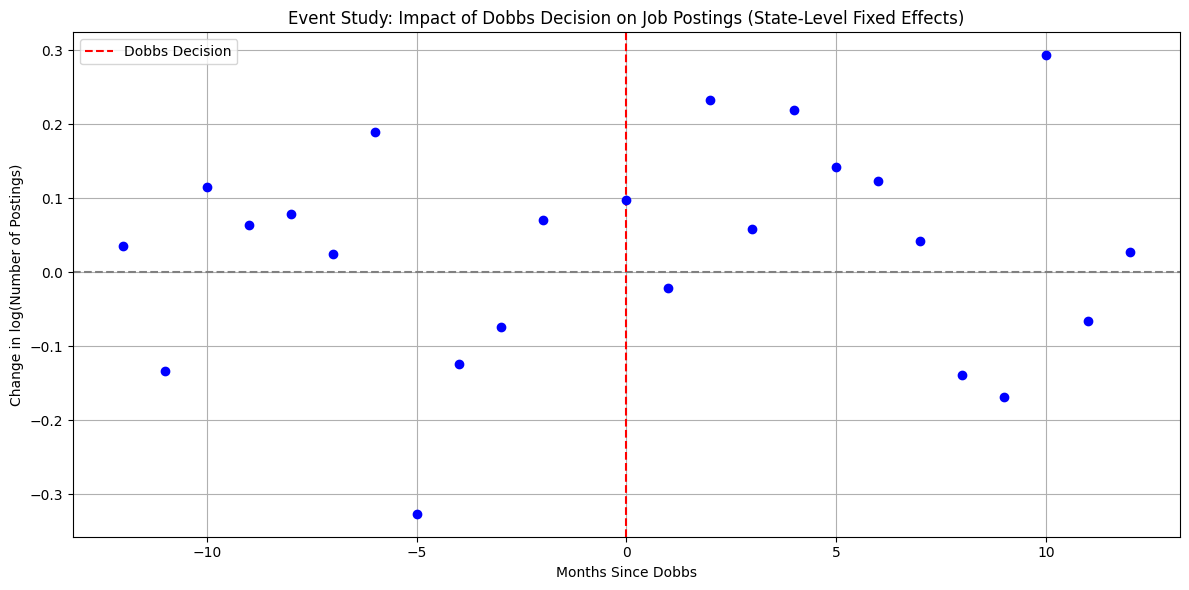

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Assume full_df contains: 'state', 'state_category', 'created'
dobbs_date = pd.to_datetime("2022-06-24")

# Normalize dates
full_df['created'] = pd.to_datetime(full_df['created'])
full_df['month'] = full_df['created'].dt.to_period('M').dt.to_timestamp()

# Clean calendar-based months since Dobbs
full_df['months_since_dobbs'] = (
    (full_df['month'].dt.year - dobbs_date.year) * 12 +
    (full_df['month'].dt.month - dobbs_date.month)
)

# Assign event_time
full_df['event_time'] = np.where(
    full_df['state_category'] == 'Protected Legal', 'never',
    full_df['months_since_dobbs']
)

# Split treated and control
treated_df = full_df[full_df['state_category'] != 'Protected Legal'].copy()
treated_df = treated_df[treated_df['months_since_dobbs'].between(-12, 12)]
treated_df['event_time'] = treated_df['months_since_dobbs']

control_df = full_df[full_df['state_category'] == 'Protected Legal'].copy()
control_df['event_time'] = 'never'

# Combine
filtered_df = pd.concat([treated_df, control_df], ignore_index=True)

# Group by state + month + event_time
grouped_df = filtered_df.groupby(['state', 'month', 'event_time']).size().reset_index(name='job_count')

# Prepare variables
grouped_df['event_time'] = grouped_df['event_time'].astype(str)
grouped_df['month_str'] = grouped_df['month'].astype(str)
grouped_df['log_postings'] = np.log1p(grouped_df['job_count'])

# Regression with state-level fixed effects
model = smf.ols(
    formula='log_postings ~ C(event_time) + C(state) + C(month_str)',
    data=grouped_df
).fit(cov_type='HC3')

# Extract event_time coefficients (exclude 'never')
event_coefs = model.params.filter(like='C(event_time)')
conf_int = model.conf_int().loc[event_coefs.index]

# Clean up labels
event_months = []
effects = []
errors = []

for label in event_coefs.index:
    match = re.search(r'C\(event_time\)\[T\.(-?\d+)\]', label)
    if match:
        month = int(match.group(1))
        event_months.append(month)
        effects.append(event_coefs[label])
        errors.append((conf_int.loc[label][1] - conf_int.loc[label][0]) / 2)

# Plot
plt.figure(figsize=(12, 6))
plt.errorbar(event_months, effects, yerr=errors, fmt='o', capsize=3, color='blue')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='red', label='Dobbs Decision')
plt.title("Event Study: Impact of Dobbs Decision on Job Postings (State-Level Fixed Effects)")
plt.xlabel("Months Since Dobbs")
plt.ylabel("Change in log(Number of Postings)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\3335065309.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_df["month"] = pd.to_datetime(full_df["created"]).dt.to_period("M").dt.to_timestamp()


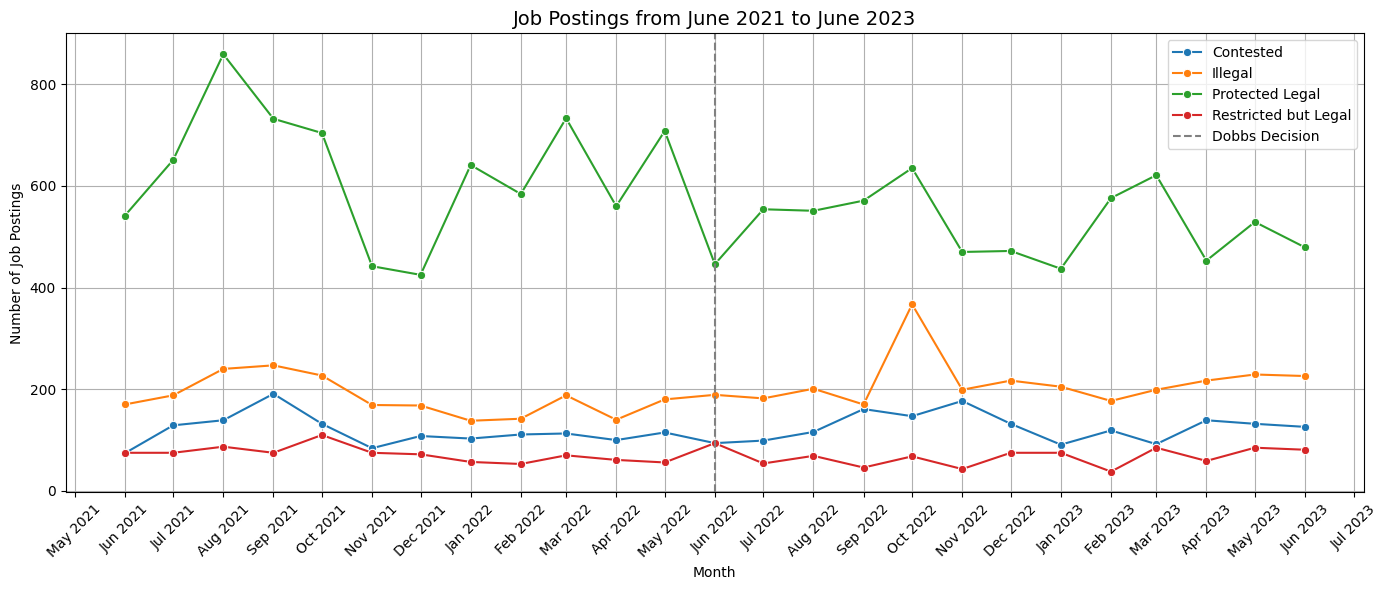

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Step 1: Make sure 'month' is a datetime object rounded to month start
full_df["month"] = pd.to_datetime(full_df["created"]).dt.to_period("M").dt.to_timestamp()

# Step 2: Filter data ±12 months around Dobbs
dobbs_date = pd.to_datetime("2022-06-24")
start = (dobbs_date - pd.DateOffset(months=12)).to_period("M").to_timestamp()
end = (dobbs_date + pd.DateOffset(months=12)).to_period("M").to_timestamp()

filtered_df = full_df[(full_df["month"] >= start) & (full_df["month"] <= end)]

# Step 3: Group by month (and optionally by state category or job type)
monthly_counts = (
    filtered_df.groupby(["month", "state_category"])
    .size()
    .reset_index(name="job_count")
)

# Step 4: Plot with Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_counts, x="month", y="job_count", hue='state_category', marker="o")

# Step 5: Add vertical line for Dobbs
plt.axvline(pd.to_datetime("2022-06-01"), color='gray', linestyle='--', label='Dobbs Decision')

# Format x-axis: show every month
plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title("Job Postings from June 2021 to June 2023", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Ensure date format
full_df["created"] = pd.to_datetime(full_df["created"])

# Truncate to first of month
full_df["month"] = full_df["created"].dt.to_period("M").dt.to_timestamp()

# Calculate months since Dobbs
full_df["months_since_dobbs"] = ((full_df["month"] - dobbs_date) / pd.Timedelta(days=30)).round().astype(int)

# Filter to ±12 months
filtered = full_df[(full_df["month"] >= "") & (full_df["months_since_dobbs"] <= 12)]

grouped = (
    filtered.groupby(["months_since_dobbs", "state_category"])
    .size()
    .reset_index(name="job_count")
)


C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\573923754.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_df["month"] = full_df["created"].dt.to_period("M").dt.to_timestamp()


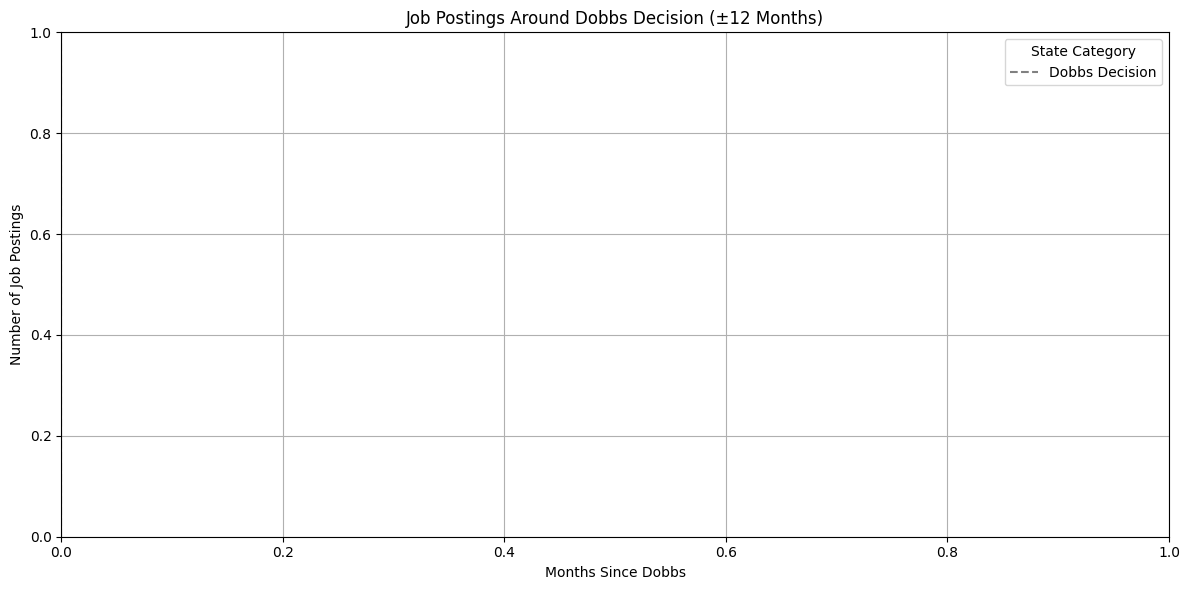

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=grouped,
    x="months_since_dobbs",
    y="job_count",
    hue="state_category",
    marker="o"
)
plt.axvline(0, color="gray", linestyle="--", label="Dobbs Decision")
plt.title("Job Postings Around Dobbs Decision (±12 Months)")
plt.xlabel("Months Since Dobbs")
plt.ylabel("Number of Job Postings")
plt.legend(title="State Category")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped = full_df.groupby("year").size().reset_index(name="job_count")

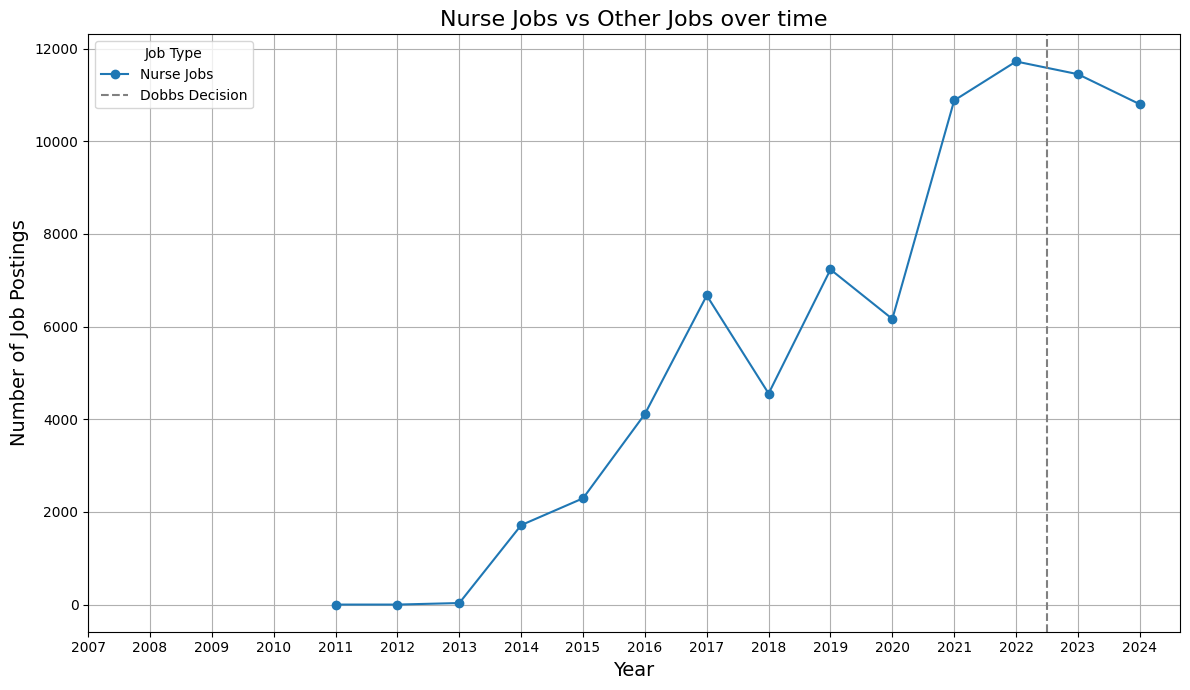

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(grouped["year"], grouped["job_count"], marker='o', label="Nurse Jobs")
# plt.plot(df_other["year"], df_other["job_count"], marker='o', label="Other Jobs")

plt.axvline(x=2022.5, color='gray', linestyle='--', label='Dobbs Decision')
plt.title("Nurse Jobs vs Other Jobs over time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Job Postings", fontsize=14)
plt.legend(title="Job Type")
plt.grid(True)
plt.xticks(sorted(df_other["year"].unique()))
plt.tight_layout()
plt.show()


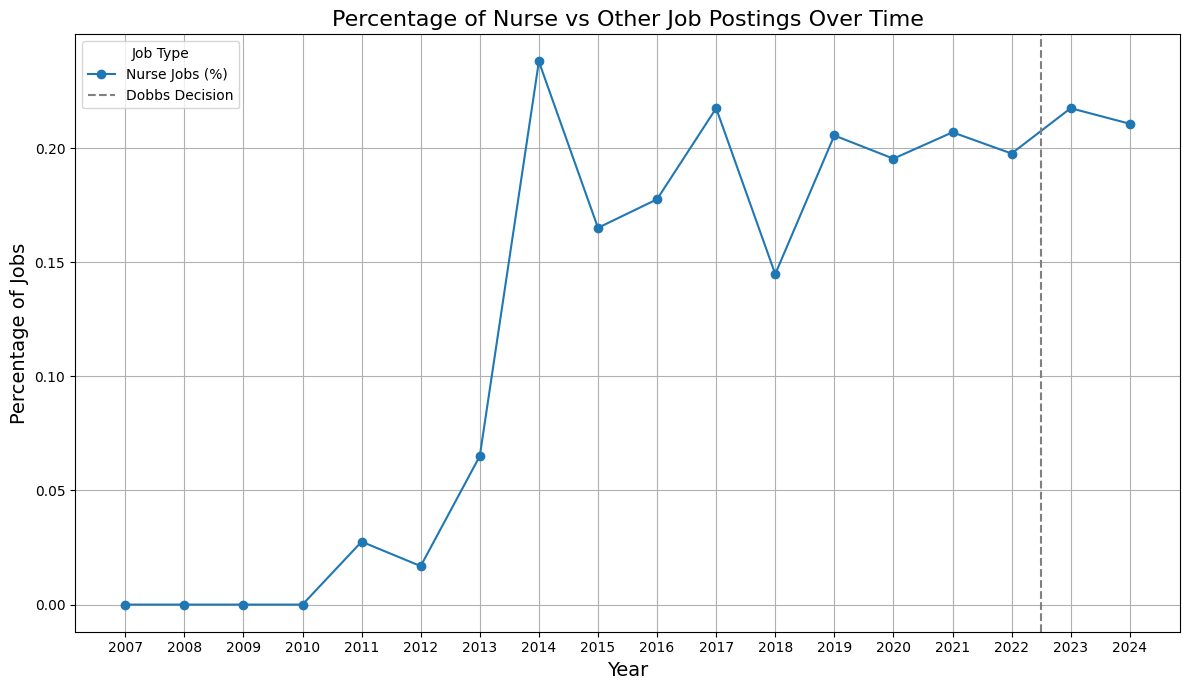

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge both DataFrames on 'year'
merged_df = pd.merge(
    grouped.rename(columns={"job_count": "nurse_jobs"}),
    df_other.rename(columns={"job_count": "other_jobs"}),
    on="year",
    how="outer"
).fillna(0)

# Compute total and percentages
merged_df["total_jobs"] = merged_df["nurse_jobs"] + merged_df["other_jobs"]
merged_df["nurse_pct"] = (merged_df["nurse_jobs"] / merged_df["total_jobs"]) * 100
merged_df["other_pct"] = (merged_df["other_jobs"] / merged_df["total_jobs"]) * 100

# Sort by year to avoid any plot disorder
merged_df = merged_df.sort_values("year")

# Plot
plt.figure(figsize=(12, 7))
plt.plot(merged_df["year"], merged_df["nurse_pct"], marker='o', label="Nurse Jobs (%)")
# plt.plot(merged_df["year"], merged_df["other_pct"], marker='o', label="Other Jobs (%)")

plt.axvline(x=2022.5, color='gray', linestyle='--', label='Dobbs Decision')
plt.title("Percentage of Nurse vs Other Job Postings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage of Jobs", fontsize=14)
plt.legend(title="Job Type")
plt.grid(True)
plt.xticks(sorted(merged_df["year"].unique()))
plt.tight_layout()
plt.show()


In [ ]:
illegal_states = {
    "AL": "2022-06-24",
    "AR": "2022-06-24",
    "MS": "2022-07-07",
    "MO": "2022-06-24",
    "OK": "2022-05-25",
    "SD": "2022-06-28",
    "TN": "2022-08-25",
    "TX": "2022-07-24",
    "ID": "2022-08-25",
    "LA": "2022-07-29",
    "WV": "2022-09-16",
    "KY": "2022-08-01"
}

contested_states = {
    "IN": "2022-09-15",   # Passed, blocked after 1 week
    "WY": "2023-03-01",   # Trigger ban blocked in court
    "WI": "2022-06-24",   # Pre-Roe ban reactivated, under legal challenge
    "AZ": "2022-09-24",   # Conflicting bans, permanently blocked in 2025
    "GA": "2022-11-23",   # 6-week ban reinstated, still challenged
    "SC": "2023-05-25",   # 6-week ban upheld, legal pushback remains
    "NC": "2023-07-01",   # 12-week ban, partially blocked in court
    "IA": "2023-07-29"    # 6-week ban upheld by Iowa Supreme Court
}

restricted_but_legal_states = {
    "FL": "2022-07-01",   # Initially 15-week ban, now 6-week ban (May 2024)
    "NE": "2023-05-20",   # 12-week ban passed and later upheld by voters (Nov 2024)
    "UT": "2022-06-24"    # Restrictions passed but blocked for part of 2023, now in effect
}

protected_legal_states = [
    "CA", "NY", "IL", "WA", "OR", "CO", "NM",
    "NJ", "CT", "MA", "ME", "VT", "MN", "MI",
    "PA", "VA", "NH", "AK", "DC", "MT", "DE",
    "KS", "RI", "NV", "ND", "OH", "HI"
]


In [ ]:
import pandas as pd
import plotly.express as px

# Ensure datetime format
full_df["created"] = pd.to_datetime(full_df["created"])

# Define state classification
def classify_state(state):
    if state in illegal_states:
        return "Illegal"
    elif state in contested_states:
        return "Contested"
    elif state in restricted_but_legal_states:
        return "Restricted but Legal"
    elif state in protected_legal_states:
        return "Protected Legal"

full_df["state_type"] = full_df["state"].apply(classify_state)

# Group by month and state type
full_df["month"] = full_df["created"].dt.to_period("M").dt.to_timestamp()
grouped = full_df.groupby(["month", "state_type"]).size().reset_index(name="job_count")

# Create interactive plot
fig = px.line(
    grouped,
    x="month",
    y="job_count",
    color="state_type",
    title="Monthly Job Postings by State Type",
    labels={"month": "Date", "job_count": "Job Count"},
    markers=False
)

# Add Dobbs decision reference line
# fig.add_vline(
#     x="2022-06-24",
#     line_dash="dash",
#     line_color="gray",
#     annotation_text="Dobbs Decision",
#     annotation_position="top right"
# )

fig.update_layout(
    hovermode="x unified",
    xaxis=dict(rangeslider_visible=True, type="date"),
    template="plotly_white"
)

fig.show()


C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\535264674.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  full_df["month"] = full_df["created"].dt.to_period("M").dt.to_timestamp()


C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\1724925931.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\1724925931.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



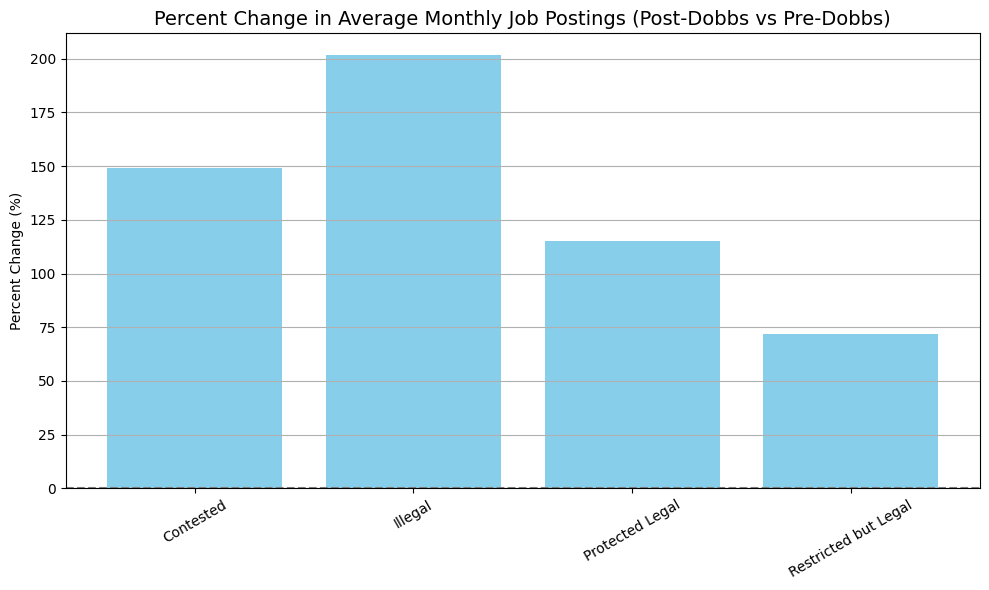

In [ ]:
dobbs_date = pd.Timestamp("2022-06-24", tz="UTC")
pre_dobbs = full_df[full_df["created"] < dobbs_date]
post_dobbs = full_df[full_df["created"] >= dobbs_date]

# Monthly average per group
pre_counts = pre_dobbs.groupby("state_type").resample("M", on="created").size().groupby("state_type").mean()
post_counts = post_dobbs.groupby("state_type").resample("M", on="created").size().groupby("state_type").mean()

# Compute percent change
change_df = pd.DataFrame({
    "Pre-Dobbs Avg": pre_counts,
    "Post-Dobbs Avg": post_counts
})
change_df["% Change"] = ((change_df["Post-Dobbs Avg"] - change_df["Pre-Dobbs Avg"]) / change_df["Pre-Dobbs Avg"]) * 100
change_df = change_df.dropna()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(change_df.index, change_df["% Change"], color="skyblue")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Percent Change in Average Monthly Job Postings (Post-Dobbs vs Pre-Dobbs)", fontsize=14)
plt.ylabel("Percent Change (%)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [ ]:
def label_state(state):
    if state in protected_legal_states:
        return "Legal State"
    elif state in illegal_states:
        return "Illegal State"
    elif state in contested_states:
        return "Contested State"
    elif state in restricted_but_legal_states:
        return "Restricted but Legal State"

full_df["state_type"] = full_df["state"].apply(label_state)
# Step 1: Group by year, state_type, and job_category to get counts
grouped = full_df.groupby(["year", "state_type", "job_category"]).size().reset_index(name="count")

# Step 2: Compute total jobs per (year, state_type) group
grouped["total"] = grouped.groupby(["year", "state_type"])["count"].transform("sum")

# Step 3: Compute percentage share for each job category
grouped["pct"] = (grouped["count"] / grouped["total"]) * 100

# Step 4: Pivot the table (optional) to get cleaner plotting or export
pivot_df = grouped.pivot_table(index=["year", "state_type"], columns="job_category", values="pct", fill_value=0).reset_index()

# Optional: view a sample
print(pivot_df.head())


job_category  year       state_type  Certified Nurse Midwife  \
0             2011  Contested State                      0.0   
1             2011    Illegal State                      0.0   
2             2012      Legal State                      0.0   
3             2013  Contested State                      0.0   
4             2013    Illegal State                     50.0   

job_category  Labor & Delivery Nurse  Maternal-Fetal Medicine  \
0                                0.0                      0.0   
1                              100.0                      0.0   
2                                0.0                      0.0   
3                              100.0                      0.0   
4                               50.0                      0.0   

job_category  Obstetrics & Gynecology  
0                               100.0  
1                                 0.0  
2                               100.0  
3                                 0.0  
4                       

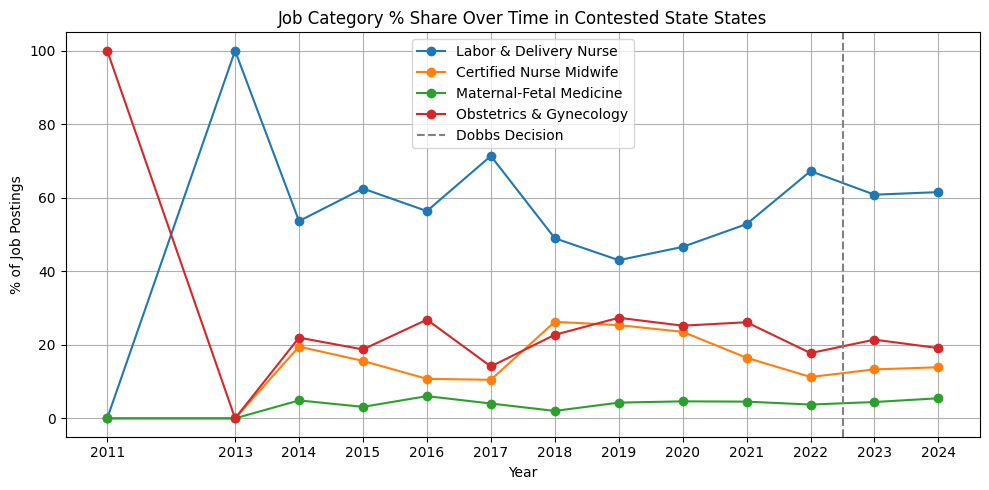

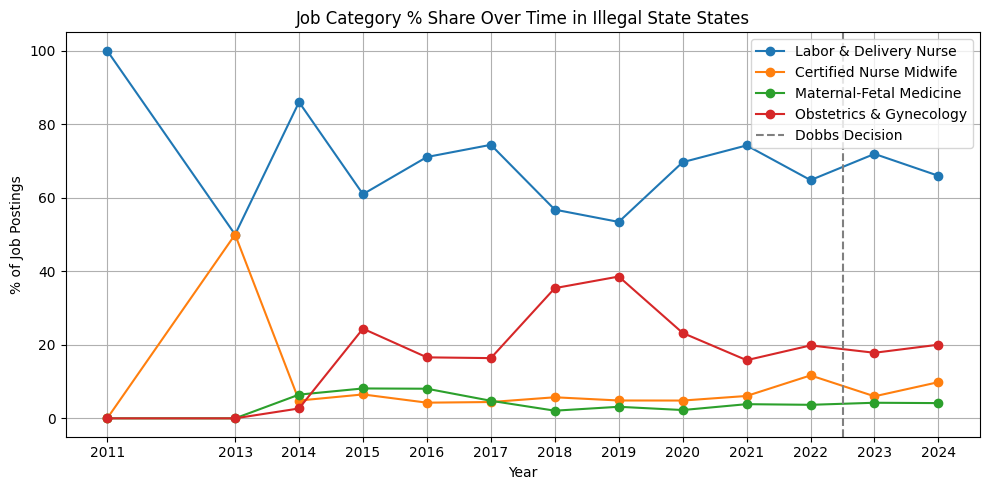

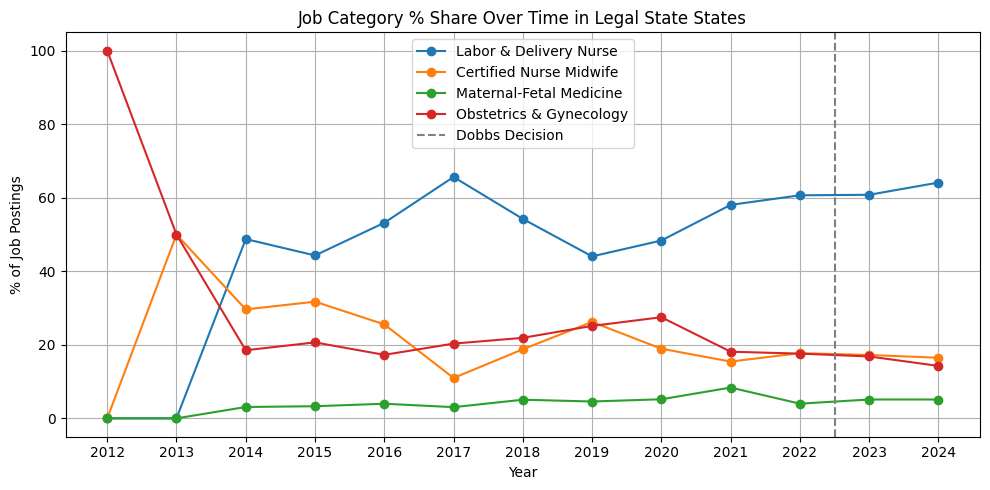

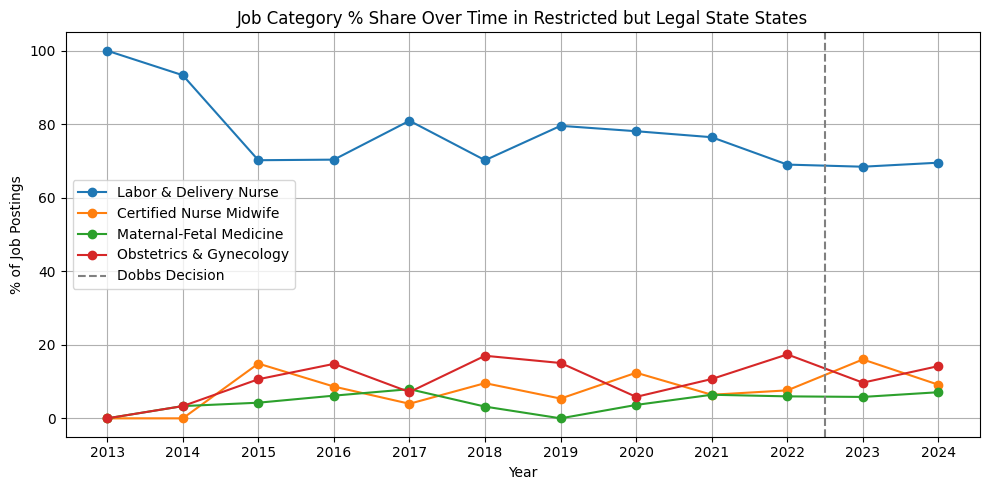

In [ ]:
import matplotlib.pyplot as plt

categories_to_plot = ["Labor & Delivery Nurse", "Certified Nurse Midwife", "Maternal-Fetal Medicine", "Obstetrics & Gynecology"]

for state in pivot_df["state_type"].unique():
    subset = pivot_df[pivot_df["state_type"] == state]
    plt.figure(figsize=(10, 5))
    for cat in categories_to_plot:
        if cat in subset.columns:
            plt.plot(subset["year"], subset[cat], marker='o', label=cat)

    plt.title(f"Job Category % Share Over Time in {state} States")
    plt.axvline(x=2022.5, color='gray', linestyle='--', label='Dobbs Decision')
    plt.xlabel("Year")
    plt.ylabel("% of Job Postings")
    plt.xticks(sorted(subset["year"].unique()))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# 1. Mark Dobbs period
dobbs_date = pd.Timestamp("2022-06-24", tz="UTC")
full_df["dobbs_period"] = full_df["created"].apply(lambda x: "Pre-Dobbs" if x <= dobbs_date else "Post-Dobbs")
start_date = pd.Timestamp('2021-06-01', tz='UTC')
end_date = pd.Timestamp('2023-07-01', tz='UTC')

full_df = full_df[(full_df['created'] >= start_date) & (full_df['created'] <= end_date)]
grouped = full_df.groupby(["dobbs_period", "state_category", "job_category"]).size().reset_index(name="count")

grouped["total"] = grouped.groupby(["dobbs_period", "state_category"])["count"].transform("sum")
grouped["pct"] = (grouped["count"] / grouped["total"]) * 100

# Step 5: Pivot to get Pre/Post columns for comparison
pivot_df = grouped.pivot(index=["state_category", "job_category"], columns="dobbs_period", values="pct").reset_index()

# Step 6: Compute change
pivot_df["change"] = pivot_df["Post-Dobbs"] - pivot_df["Pre-Dobbs"]
pivot_df = pivot_df.sort_values(by="change", ascending=False)


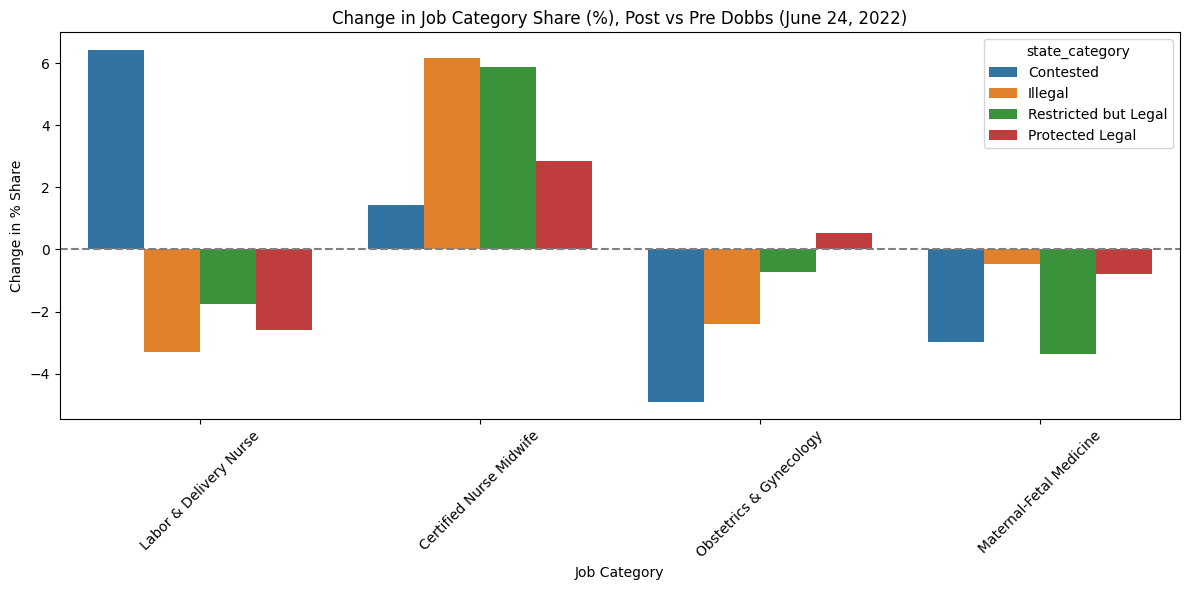

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pivot_df,
    x="job_category",
    y="change",
    hue="state_category"
)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Change in Job Category Share (%), Post vs Pre Dobbs (June 24, 2022)")
plt.ylabel("Change in % Share")
plt.xlabel("Job Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


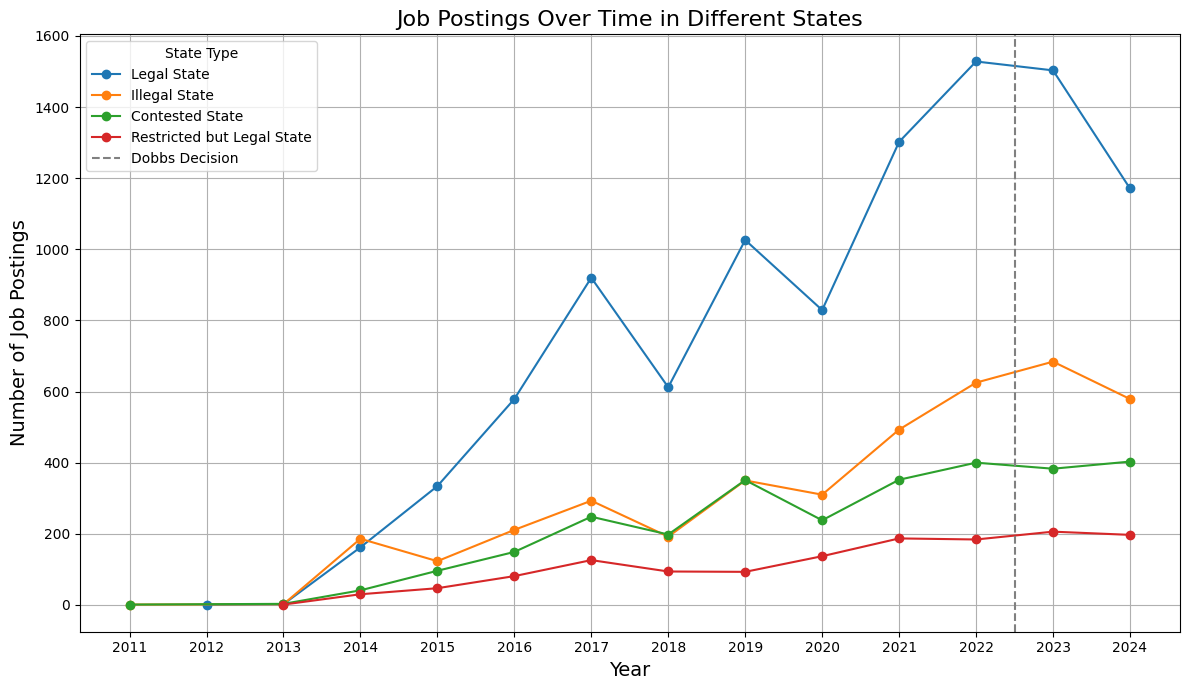

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

full_df["year"] = full_df["created"].dt.year

# Label states as Legal or Illegal
def label_state(state):
    if state in protected_legal_states:
        return "Legal State"
    elif state in illegal_states:
        return "Illegal State"
    elif state in contested_states:
        return "Contested State"
    elif state in restricted_but_legal_states:
        return "Restricted but Legal State"

full_df["state_type"] = full_df["state"].apply(label_state)

# --- 3. Group the data ---

# Group by year and state_category, then count number of jobs
grouped = full_df.groupby(["year", "state_type"]).size().reset_index(name="job_count")
# grouped = full_df[full_df["state", "state_category"].isin()]
# grouped = grouped.groupby(["year"]).size().reset_index(name="job_count")

# Only keep Legal and Illegal states (ignore unknowns)
# grouped = grouped[grouped["state_category"].isin(["Legal State", "Illegal State"])]

# --- 4. Plot the data ---


# Instead, plot all three categories
plt.figure(figsize=(12, 7))
for state_type in ["Legal State", "Illegal State","Contested State", "Restricted but Legal State"]:
    subset = grouped[grouped["state_type"] == state_type]
    plt.plot(subset["year"], subset["job_count"], marker='o', label=state_type)

plt.axvline(x=2022.5, color='gray', linestyle='--', label='Dobbs Decision')
plt.title("Job Postings Over Time in Different States", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Job Postings", fontsize=14)
plt.legend(title="State Type")
plt.grid(True)
plt.xticks(sorted(full_df["year"].unique()))
plt.tight_layout()
plt.show()


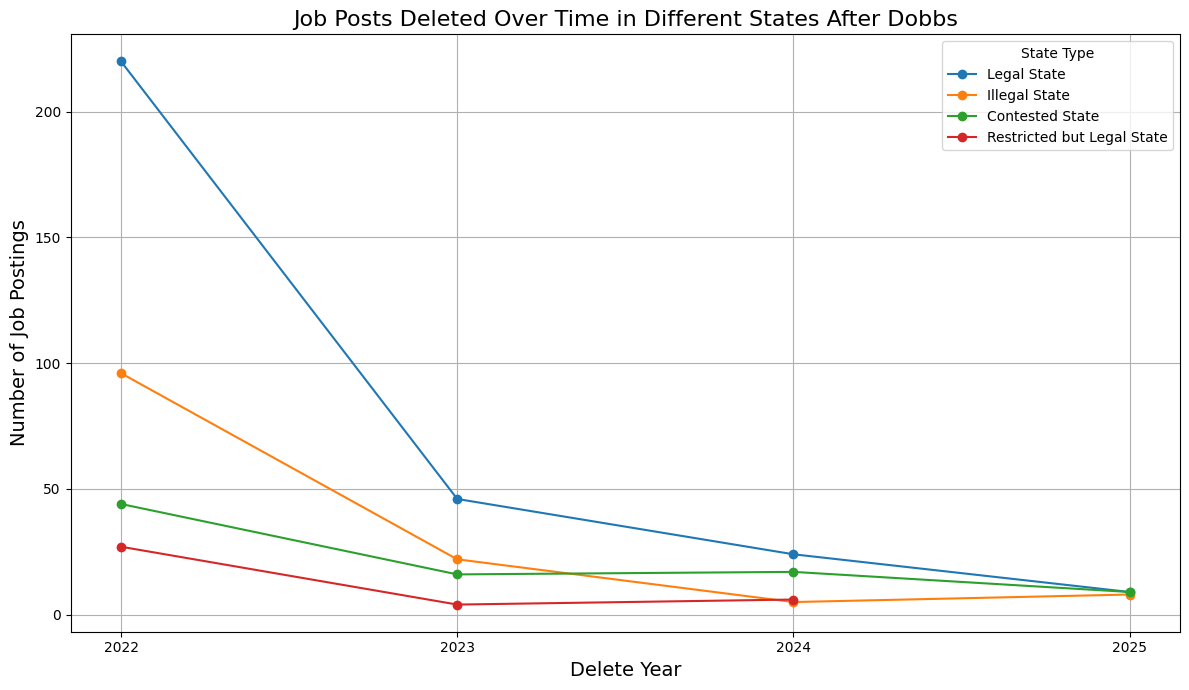

In [ ]:
full_df["delete_year"] = full_df["delete_date"].dt.year
before_dobbs = full_df[full_df['created'] < dobbs_date]
before_dobbs = before_dobbs[before_dobbs["delete_date"] >= dobbs_date]

delete_grouped = before_dobbs.groupby(["delete_year", "state_category"]).size().reset_index(name="job_count_delete")
plt.figure(figsize=(12, 7))
for state_type in ["Legal State", "Illegal State","Contested State", "Restricted but Legal State"]:
    subset = delete_grouped[delete_grouped["state_category"] == state_type]
    plt.plot(subset["delete_year"], subset["job_count_delete"], marker='o', label=state_type)

# plt.axvline(x=2022.5, color='gray', linestyle='--', label='Dobbs Decision')
plt.title("Job Posts Deleted Over Time in Different States After Dobbs", fontsize=16)
plt.xlabel("Delete Year", fontsize=14)
plt.ylabel("Number of Job Postings", fontsize=14)
plt.legend(title="State Type")
plt.grid(True)
plt.xticks(sorted(before_dobbs["delete_year"].unique()))
plt.tight_layout()
plt.show()


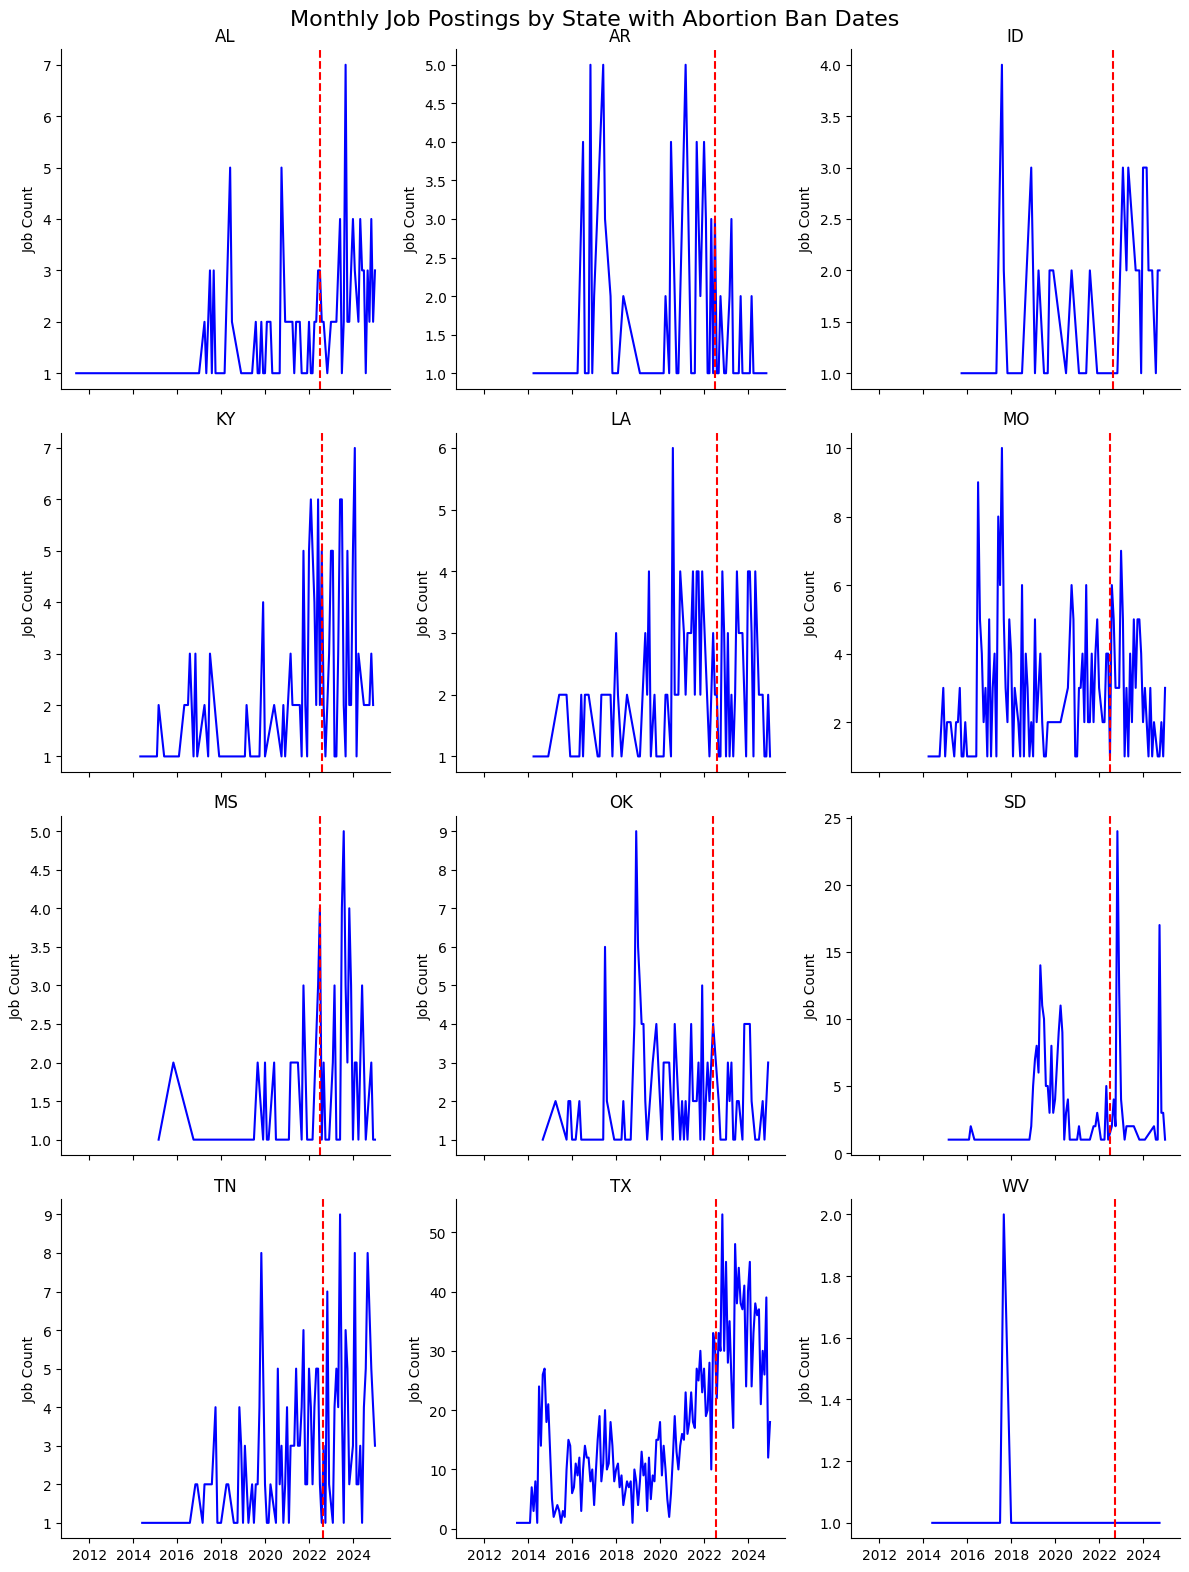

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# Ensure your dates are in datetime format
# df['post_date'] = pd.to_datetime(df['post_date'])

# Optional: filter to only relevant job types
# df = df[df['job_category'] == 'Obstetrics & Gynecology']

# Abortion ban dates by state (example subset)
# ban_dates = {
#     "MS": "2022-07-07",
#     "GA": "2022-11-23",
#     "SC": "2023-05-25",
#     "TX": "2022-07-24",
#     "TN": "2022-08-25",
#     "OK": "2022-05-25"
# }

# Monthly job counts per state
monthly_counts_illegal = (
    full_df.groupby([full_df['state'], pd.Grouper(key='created', freq='ME')])
      .size()
      .reset_index(name='job_count')
)

# Convert ban_dates to datetime for matching
illegal_states_dt = {state: pd.to_datetime(date) for state, date in illegal_states.items()}

# Only include states that exist in the dataset
# valid_states = monthly_counts['state'].unique()
# ban_dates_dt = {state: date for state, date in ban_dates_dt.items() if state in valid_states}

# Plot using seaborn FacetGrid
g = sns.FacetGrid(
    monthly_counts_illegal[monthly_counts_illegal['state'].isin(illegal_states_dt.keys())],
    col="state", col_wrap=3, height=4, sharey=False
)
g.map_dataframe(sns.lineplot, x='created', y='job_count', color='blue')

# Add vertical lines for each state's ban date
for ax, state in zip(g.axes.flatten(), g.col_names):
    ban_date = illegal_states_dt[state]
    ax.axvline(ban_date, color='red', linestyle='--')
    ax.set_title(state)
    ax.set_xlabel("")
    ax.set_ylabel("Job Count")

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Monthly Job Postings by State with Abortion Ban Dates", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
contested_states = {
    "IN": "2022-09-15",   # Passed, blocked after 1 week
    "WY": "2023-03-01",   # Trigger ban blocked in court
    "WI": "2022-06-24",   # Pre-Roe ban reactivated, under legal challenge
    "AZ": "2022-09-24",   # Conflicting bans, permanently blocked in 2025
    "GA": "2022-11-23",   # 6-week ban reinstated, still challenged
    "SC": "2023-05-25",   # 6-week ban upheld, legal pushback remains
    "NC": "2023-07-01",   # 12-week ban, partially blocked in court
    "IA": "2023-07-29"    # 6-week ban upheld by Iowa Supreme Court
}

C:\Users\Yatish\AppData\Local\Temp\ipykernel_10584\3629795640.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="created", freq="M"))


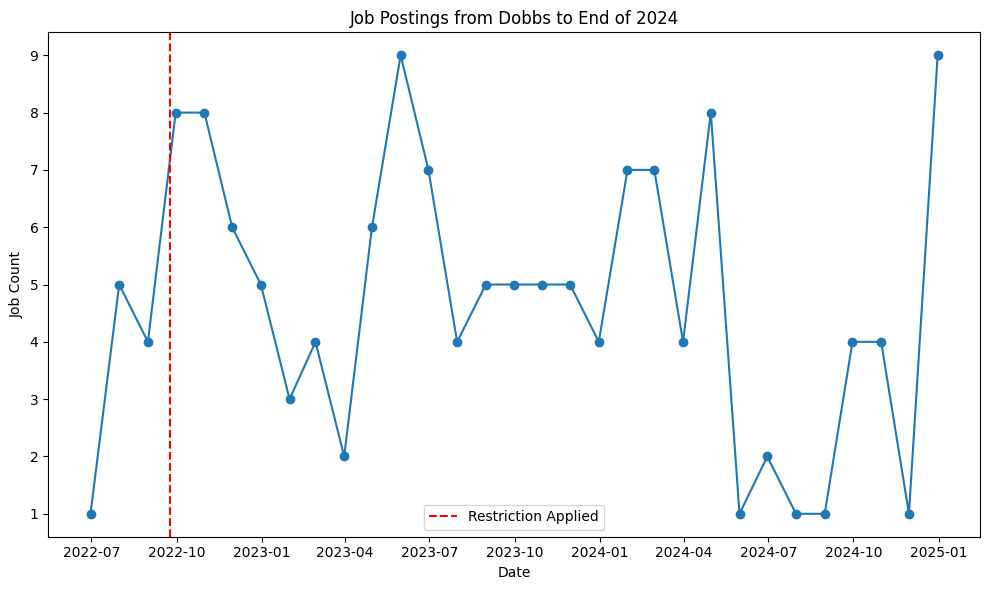

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
end_date = pd.Timestamp("2024-12-31", tz="UTC")
ban_date = pd.Timestamp("2022-09-24", tz="UTC") # Change ban date for the respective state.
# Filter the dataframe for the date range
filtered_df = full_df[full_df['state']=='AZ'] # Change the state if needed.
filtered_df = filtered_df[(filtered_df["created"] >= dobbs_date) & (filtered_df["created"] <= end_date)]

# Group by month for plotting
monthly_counts = (
    filtered_df
    .groupby(pd.Grouper(key="created", freq="M"))
    .size()
    .reset_index(name="job_count")
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts["created"], monthly_counts["job_count"], marker='o')
plt.axvline(ban_date, color='red', linestyle='--', label='Restriction Applied')
plt.title("Job Postings from Dobbs to End of 2024")
plt.xlabel("Date")
plt.ylabel("Job Count")
plt.legend()
plt.tight_layout()
plt.show()


## NER

In [ ]:
import re
# REGEX FOR FILTERING OUT POSTINGS WITH PAY INFORMATION INCLUDED.
pay_pattern = re.compile(
    r"""
    (
        # Require a number (with optional $ and k), THEN time/pay context
        \$?\s?\d{2,6}(?:[.,]\d{1,3})?\s?(k|K)?
        \s*
        (base|guaranteed|first\s+year|starting|salary|compensation|pay|rate|
         (per|/)\s?(hour|hr|week|wk|month|year|yr|annum|annually|monthly))
    )
    |
    (
        (pay|salary|compensation|rate|hiring)\s*(range|scale)?\s*[:\-]?\s*(\w+\s*){0,3}?\$?\s?\d{2,6}(?:[.,]\d{1,3})?\s?(k|K)?
    )
    |
    (
        # Match ranges only with actual numbers
        (pay|salary|compensation|rate)\s*(range|scale)?\s*[:\-]?\s*
        \$?\s?\d{2,6}(?:[.,]\d{1,3})?\s?(k|K)?
        \s*[-–to]+\s*
        \$?\s?\d{2,6}(?:[.,]\d{1,3})?\s?(k|K)?
        \s*(per|/)?\s?(hour|hr|week|wk|month|year|yr|annum|annually|monthly|base|guaranteed)?
    )
    |
    (
        # Standalone range like "$47.56 - $77.27"
        # \$\s?\d{1,6}(?:[.,]\d{1,2})?\s*[-–to]+\s*\$?\s?\d{1,6}(?:[.,]\d{1,2})?
        (?:\$\s?\d{1,6}(?:[.,]\d{1,3})?\s?(k|K)?\s*
        (?:[-–to]+\s*\$\s?\d{1,6}(?:[.,]\d{1,3})?\s?(k|K)?\s*){1,})
    )
    """,
    re.IGNORECASE | re.VERBOSE
)

# bonus_keywords = re.compile(
#     r"(bonus|sign[-\s]?on|relocation|stipend|incentive|award|gift)",
#     re.IGNORECASE
# )

# def is_relevant_pay(text):
#     has_pay = bool(pay_pattern.search(text))
#     has_only_bonus = not has_pay and bonus_keywords.search(text)
#     return has_pay and not has_only_bonus

df_with_pay = full_df[full_df["description"].str.contains(pay_pattern, na=False)]
print(df_with_pay.shape)
#df_with_pay.to_csv('labeled_with_pay.csv')

C:\Users\Yatish\AppData\Local\Temp\ipykernel_29244\3868024504.py:46: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



(9750, 13)


In [ ]:
top_10 = df_with_pay.head(10)
top_10.to_csv('top_10.csv')

In [ ]:
df_without_pay = full_df[~full_df["description"].str.contains(pay_pattern, na=False)]
print(df_without_pay.shape)
df_without_pay.to_csv('without_pay.csv')

C:\Users\Yatish\AppData\Local\Temp\ipykernel_10584\3774547794.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_without_pay = full_df[~full_df["description"].str.contains(pay_pattern, na=False)]


(16052, 10)


In [ ]:
# Filter: descriptions without the $ symbol
dollar_df = df_without_pay[df_without_pay["description"].str.contains(r"\$", na=False)]

# Optional: print how many rows were filtered
print(f"Descriptions with $ sign: {dollar_df.shape[0]}")
dollar_df.to_csv('dollar_data.csv')

Descriptions with $ sign: 2132


### OPENROUTER (Deepseek, Claude, etc.)

In [ ]:
import pandas as pd
import json
from tqdm import tqdm
from dotenv import load_dotenv
import os
import openai

# Load environment variables
load_dotenv()
OPENROUTER_KEY = os.getenv("OPENROUTER_KEY")

# Set up OpenAI client to use OpenRouter
client = openai.OpenAI(
    api_key=OPENROUTER_KEY,
    base_url="https://openrouter.ai/api/v1",
)

MODEL_ID = "deepseek/deepseek-chat"

# Load CSV
df = pd.read_csv("labeled_with_pay.csv")  # Must include 'hash' and 'description'
df["description"] = df["description"].fillna("")
df = df.head(10)

# Define extraction function
def extract_job_fields(job_text):
    prompt = f"""
You are an information extraction assistant.
Given a job description, extract the following fields in JSON format:

- pay_frequency (daily, hourly, yearly, etc, if not mentioned, take hourly if double digit salary or small value, take yearly if a big value)
- minimum_pay (if a single value is mentioned, put it here, without currency sign)
- maximum_pay (if a pay range is mentioned then fill it too, without currency sign)
- work_mode (remote, in-person, or hybrid)
- skills (keep it simple)
- benefits
- gendered_words (if any; that carry a bias towards a specific gender)

If any field is not found, leave it blank. Only return the JSON object in this structure:
{{
  "pay_frequency": "",
  "minimum_pay": "",
  "maximum_pay": "",
  "work_mode": "",
  "skills": "",
  "benefits": "",
  "gendered_words": ""
}}

\"\"\"{job_text}\"\"\"
"""
    try:
        response = client.chat.completions.create(
            model=MODEL_ID,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2,
        )
        content = response.choices[0].message.content
        return json.loads(content)
    except Exception as e:
        print(f"Error: {e}")
        return {}

# Process rows
results = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_job_fields(desc)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(df, on="hash", how="left")
result_df.to_csv("deepseek_structured_jobs_output.csv", index=False)

print("Extraction complete. Results saved to 'deepseek_structured_jobs_output.csv'")


 10%|█         | 1/10 [00:07<01:09,  7.69s/it]

Error: Expecting value: line 1 column 1 (char 0)


 20%|██        | 2/10 [00:12<00:47,  5.93s/it]

Error: Expecting value: line 1 column 1 (char 0)


 30%|███       | 3/10 [00:16<00:36,  5.22s/it]

Error: Expecting value: line 1 column 1 (char 0)


 40%|████      | 4/10 [00:21<00:30,  5.05s/it]

Error: Expecting value: line 1 column 1 (char 0)


 50%|█████     | 5/10 [00:28<00:28,  5.67s/it]

Error: Expecting value: line 1 column 1 (char 0)


 50%|█████     | 5/10 [00:29<00:29,  5.85s/it]


KeyboardInterrupt: 

### GPT

In [ ]:
# Create OpenAI client using your OpenAI API key mentioned in the .env file.
from openai import OpenAI
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

client = OpenAI()

#### Prompt-1

In [ ]:
import json
from tqdm import tqdm

FIELDS = [
    "pay_frequency", "minimum_pay", "maximum_pay", "work_mode",
    "skills", "benefits"
]

SYSTEM_PROMPT = "Extract pay_frequency, minimum_pay, maximum_pay, work_mode, skills, benefits, from the job description and return in json format as output without any additional text."

def extract_with_gpt(description, model="gpt-4o-mini"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": description}
            ],
            temperature=0
        )
        extracted = json.loads(response.choices[0].message.content)
    except Exception as e:
        print(f"Error processing hash {hash}: {e}")
        extracted = {field: "" for field in FIELDS}

    return extracted

results = []
for _, row in tqdm(top_10.iterrows(), total=len(top_10)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_with_gpt(desc)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(top_10, on="hash", how="left")
result_df.to_csv("gpt_prompt_1.csv", index=False)

print("Extraction complete.")

100%|██████████| 10/10 [00:37<00:00,  3.77s/it]

Extraction complete.


#### Prompt-2

In [ ]:
import json
from tqdm import tqdm

FIELDS = [
    "pay_frequency", "minimum_pay", "maximum_pay", "work_mode",
    "skills", "benefits"
]

SYSTEM_PROMPT = "Extract pay_frequency (hourly, daily, monthly, yearly), minimum_pay, maximum_pay, work_mode(in-person, remote, or hybrid), skills, benefits, from the job description and return in json format as output without any additional text."

def extract_with_gpt(description, hash, model="gpt-4o-mini"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": description}
            ],
            temperature=0
        )
        extracted = json.loads(response.choices[0].message.content)
    except Exception as e:
        print(f"Error processing hash {hash}: {e}")
        extracted = {field: "" for field in FIELDS}

    return extracted

results = []
for _, row in tqdm(top_10.iterrows(), total=len(top_10)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_with_gpt(desc,hash_id)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(top_10, on="hash", how="left")
result_df.to_csv("gpt_prompt_2.csv", index=False)

print("Extraction complete.")

 90%|█████████ | 9/10 [00:31<00:03,  3.01s/it]

Error processing hash 0725e56fb19fb1e8d3b45ac0a48c7dc8: Expecting value: line 1 column 1 (char 0)


100%|██████████| 10/10 [00:33<00:00,  3.34s/it]

Extraction complete.


#### Prompt-3

In [ ]:
import json
from tqdm import tqdm

FIELDS = [
    "pay_frequency", "minimum_pay", "maximum_pay", "work_mode",
    "skills", "benefits"
]

SYSTEM_PROMPT = "Extract pay_frequency(hourly, daily, weekly, monthly, yearly, etc.), minimum_pay, maximum_pay, work_mode(in-person, remote, or hybrid), skills, benefits, from the given job description, and return in json format as output without any other text. Keep skills and benefits concise and comprehensive. Leave blank if any field is not found."

def extract_with_gpt(description, model="gpt-4o-mini"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": description}
            ],
            temperature=0
        )
        extracted = json.loads(response.choices[0].message.content)
    except Exception as e:
        print(f"Error processing hash {hash}: {e}")
        extracted = {field: "" for field in FIELDS}

    return extracted

results = []
for _, row in tqdm(top_10.iterrows(), total=len(top_10)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_with_gpt(desc)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(top_10, on="hash", how="left")
result_df.to_csv("gpt_prompt_3.csv", index=False)

print("Extraction complete.")

 90%|█████████ | 9/10 [00:18<00:02,  2.04s/it]

Error processing hash <built-in function hash>: Expecting value: line 1 column 1 (char 0)


100%|██████████| 10/10 [00:19<00:00,  1.95s/it]

Extraction complete.


#### Prompt-4

In [ ]:
import json
from tqdm import tqdm

FIELDS = [
    "pay_frequency", "minimum_pay", "maximum_pay", "work_mode",
    "skills", "benefits"
]

SYSTEM_PROMPT = """Extract the following information from the given job description in JSON format:
- pay_frequency (hourly, daily, weekly, monthly, yearly, etc.)
- minimum_pay
- maximum_pay
- work_mode (in-person, remote, hybrid)
- skills (list, not too wordy, but not too general)
- benefits (list)

Return the JSON object without any other text."""

def extract_with_gpt(description, hash, model="gpt-4o-mini"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": description}
            ],
            temperature=0
        )
        extracted = json.loads(response.choices[0].message.content)
    except Exception as e:
        print(f"Error processing hash {hash}: {e}")
        extracted = {field: "" for field in FIELDS}

    return extracted

results = []
for _, row in tqdm(top_10.iterrows(), total=len(top_10)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_with_gpt(desc, hash_id)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(top_10, on="hash", how="left")
result_df.to_csv("gpt_prompt_4.csv", index=False)

print("Extraction complete.")

100%|██████████| 10/10 [00:28<00:00,  2.82s/it]

Extraction complete.


#### Old Prompt

In [ ]:
import json
from tqdm import tqdm

FIELDS = [
    "pay_frequency", "minimum_pay", "maximum_pay", "work_mode",
    "skills", "benefits"
]

SYSTEM_PROMPT = """You are an information extraction assistant.
Given a job description, extract the following fields in JSON format:

- pay_frequency (daily, hourly, yearly, etc)
- minimum_pay (if a single value is mentioned, put it here, without currency sign)
- maximum_pay (if a pay range is mentioned then fill it too, without currency sign)
- work_mode (remote, in-person, or hybrid)
- skills (keep it simple)
- benefits

If any field is not found, leave it blank. Only return the JSON object in this structure:
{{
  "pay_frequency": "",
  "minimum_pay": "",
  "maximum_pay": "",
  "work_mode": "",
  "skills": [],
  "benefits": []
}}
"""

def extract_with_gpt(description, hash, model="gpt-4o-mini"):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": description}
            ],
            temperature=0
        )
        extracted = json.loads(response.choices[0].message.content)
    except Exception as e:
        print(f"Error processing hash {hash}: {e}")
        extracted = {field: "" for field in FIELDS}

    return extracted

results = []
for _, row in tqdm(top_10.iterrows(), total=len(top_10)):
    hash_id = row["hash"]
    desc = row["description"]
    fields = extract_with_gpt(desc, hash_id)
    fields["hash"] = hash_id
    results.append(fields)

# Merge and save
result_df = pd.DataFrame(results)
result_df = result_df.merge(top_10, on="hash", how="left")
result_df.to_csv("gpt4omini_top_10_output.csv", index=False)

print("Extraction complete. Results saved to 'gpt4omini_top_10_output.csv'")

100%|██████████| 10/10 [00:32<00:00,  3.22s/it]

Extraction complete. Results saved to 'gpt4omini_top_10_output.csv'


#### GPT Batch API

In [ ]:
import pandas as pd
full_df = pd.read_csv('full_data.csv')

In [ ]:
import json

SYSTEM_PROMPT = """Extract the following information from the given job description in JSON format:
- pay_frequency (hourly, daily, weekly, monthly, yearly, etc.)
- minimum_pay
- maximum_pay
- work_mode (in-person, remote, hybrid)
- skills (list, not too wordy, but not too general)
- benefits (list)

Return the JSON object without any other text.
"""

def create_batch_input_file(df, output_path="batch_input.jsonl"):
    with open(output_path, "w") as f:
        for _, row in df.iterrows():
            description = str(row["description"]) if pd.notna(row["description"]) else ""
            request = {
                "custom_id": str(row["hash"]),
                "method": "POST",
                "url": "/v1/chat/completions",
                "body": {
                    "model": "gpt-4o-mini",
                    "temperature": 0,
                    "messages": [
                        {"role": "system", "content": SYSTEM_PROMPT},
                        {"role": "user", "content": description[:30000]} # Description limit set for maximum 30000 characters.
                    ]
                }
            }
            f.write(json.dumps(request) + "\n")

create_batch_input_file(df)


In [ ]:
with open("batch_input.jsonl", "rb") as f:   # Uploading batch input file to OpenAI platform.
    file = client.files.create(
        file=f,
        purpose="batch"
    )

print("Uploaded file ID:", file.id)

In [ ]:
batch = client.batches.create(     # Create batch job.
    input_file_id=file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h"  # or "1h" if you're doing <50k tokens
)

print("Batch submitted. ID:", batch.id)

In [ ]:
status = client.batches.retrieve(batch.id) # Check job status.
print("Status:", status.status)
# print(status.errors)

In [ ]:
import json
import pandas as pd

# Function for parsing json batch output.
def load_batch_output(jsonl_path):
    results = []
    errors = []

    with open(jsonl_path, "r", encoding="utf-8") as f:
        for line in f:
            try:
                obj = json.loads(line)
                custom_id = obj.get("custom_id")
                raw = obj["response"]["body"]["choices"][0]["message"]["content"]

                try:
                    parsed = json.loads(raw)
                except json.JSONDecodeError as e:
                    # fallback: store raw text if it's broken JSON
                    parsed = {
                        "minimum_pay": "",
                        "maximum_pay": "",
                        "pay_frequency": "",
                        "work_mode": "",
                        "skills": "",
                        "benefits": "",
                        "raw_text": raw[:1000]  # preview for debugging
                    }
                    errors.append((custom_id, "JSONDecodeError", str(e)))

                parsed["hash"] = custom_id
                results.append(parsed)

            except Exception as e:
                errors.append((obj.get("custom_id", "unknown"), "OuterError", str(e)))

    df_results = pd.DataFrame(results)
    df_errors = pd.DataFrame(errors, columns=["hash", "error_type", "message"])
    return df_results, df_errors


In [ ]:
# Manually download the batch output file from OpenAI platform page once the job is complete.
df_ner, df_errors = load_batch_output("batch_output_file.jsonl") # Change the path to downloaded batch output file.
df_final = df.merge(df_ner, on="hash", how="left")
df_final.to_csv("jobs_with_extracted_fields.csv", index=False)
df_errors.to_csv("parsing_errors.csv", index=False)


In [ ]:
df_final.shape